# Model Training Evaluation

### By Alina Gonzalez and Jesse Elliott

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten, Conv1D, MaxPooling1D

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

### Preprocessing

In [3]:
train = pd.read_csv('data/training.csv')
test = pd.read_csv('data/test.csv')
valid = pd.read_csv('data/validation.csv')

EMOTION_KEY = {0: 'anger', 1: 'fear', 2: 'joy', 3:'love', 4:'sadness', 5: 'surprise'}
train['label_text'] = train['label'].map(EMOTION_KEY)
test['label_text'] = test['label'].map(EMOTION_KEY)
valid['label_text'] = valid['label'].map(EMOTION_KEY)

In [21]:
# tokenize text into sequences
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train['text'])
train_sequences = tokenizer.texts_to_sequences(train['text'])
test_sequences = tokenizer.texts_to_sequences(test['text'])
valid_sequences = tokenizer.texts_to_sequences(valid['text'])

In [22]:
# pad the text sequences
max_length = max([len(seq) for seq in train_sequences])
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')
valid_padded = pad_sequences(valid_sequences, maxlen=max_length, padding='post')

### Models

In [23]:
# a simple feed-forward neural network using sequential dense layers
def simple_ffn(input_shape, output_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dense(output_shape, activation='softmax')
    ])
    return model

# a recurrent neural network model
def rnn_model(input_shape, output_shape):
    model = Sequential([
        Embedding(input_dim=10000, output_dim=64, input_length=input_shape),
        LSTM(64),
        Dense(output_shape, activation='softmax')
    ])
    return model

# a convolutional neural network model
def cnn_model(input_shape, output_shape):
    model = Sequential([
        Embedding(input_dim=10000, output_dim=64, input_length=input_shape),
        Conv1D(64, 3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(output_shape, activation='softmax')
    ])
    return model

### Training

In [24]:
# func to train the model and output evaluation of training based on the history
def train_and_evaluate(model, train_data, train_labels, valid_data, valid_labels, test_data, test_labels):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_data, train_labels, epochs=10, validation_data=(valid_data, valid_labels), verbose=2)
    loss, accuracy = model.evaluate(test_data, test_labels, verbose=2)
    return history, loss, accuracy

In [25]:
X_train, y_train = train_padded, train['label'].values
X_test, y_test = test_padded, test['label'].values
X_valid, y_valid = valid_padded, valid['label'].values

In [26]:
input_shape = X_train.shape[1:]
output_shape = len(train['label'].unique())
ffn_model = simple_ffn(input_shape, output_shape)
ffn_history, ffn_loss, ffn_accuracy = train_and_evaluate(ffn_model, X_train, y_train, X_valid, y_valid, X_test, y_test)

Epoch 1/10
500/500 - 0s - loss: 208.1572 - accuracy: 0.2409 - val_loss: 92.4014 - val_accuracy: 0.2390 - 402ms/epoch - 803us/step
Epoch 2/10
500/500 - 0s - loss: 82.0575 - accuracy: 0.2463 - val_loss: 54.2295 - val_accuracy: 0.2610 - 207ms/epoch - 414us/step
Epoch 3/10
500/500 - 0s - loss: 49.8431 - accuracy: 0.2531 - val_loss: 38.4470 - val_accuracy: 0.2760 - 205ms/epoch - 411us/step
Epoch 4/10
500/500 - 0s - loss: 34.4512 - accuracy: 0.2579 - val_loss: 28.8827 - val_accuracy: 0.2755 - 205ms/epoch - 410us/step
Epoch 5/10
500/500 - 0s - loss: 25.3817 - accuracy: 0.2665 - val_loss: 24.6865 - val_accuracy: 0.2115 - 204ms/epoch - 408us/step
Epoch 6/10
500/500 - 0s - loss: 19.4811 - accuracy: 0.2624 - val_loss: 16.0893 - val_accuracy: 0.2400 - 204ms/epoch - 409us/step
Epoch 7/10
500/500 - 0s - loss: 14.9959 - accuracy: 0.2634 - val_loss: 13.2145 - val_accuracy: 0.2570 - 203ms/epoch - 406us/step
Epoch 8/10
500/500 - 0s - loss: 12.3913 - accuracy: 0.2664 - val_loss: 12.3079 - val_accuracy: 0

In [27]:
rnn_input_shape = X_train.shape[1]
rnn_model = rnn_model(rnn_input_shape, output_shape)
rnn_history, rnn_loss, rnn_accuracy = train_and_evaluate(rnn_model, X_train, y_train, X_valid, y_valid, X_test, y_test)

Epoch 1/10
500/500 - 8s - loss: 1.5824 - accuracy: 0.3304 - val_loss: 1.5845 - val_accuracy: 0.3520 - 8s/epoch - 16ms/step
Epoch 2/10
500/500 - 7s - loss: 1.5792 - accuracy: 0.3308 - val_loss: 1.5869 - val_accuracy: 0.3520 - 7s/epoch - 14ms/step
Epoch 3/10
500/500 - 7s - loss: 1.5768 - accuracy: 0.3320 - val_loss: 1.5796 - val_accuracy: 0.3520 - 7s/epoch - 14ms/step
Epoch 4/10
500/500 - 7s - loss: 1.5769 - accuracy: 0.3310 - val_loss: 1.5830 - val_accuracy: 0.3520 - 7s/epoch - 14ms/step
Epoch 5/10
500/500 - 7s - loss: 1.5766 - accuracy: 0.3362 - val_loss: 1.5798 - val_accuracy: 0.3495 - 7s/epoch - 14ms/step
Epoch 6/10
500/500 - 7s - loss: 1.5624 - accuracy: 0.3411 - val_loss: 1.5504 - val_accuracy: 0.3655 - 7s/epoch - 14ms/step
Epoch 7/10
500/500 - 7s - loss: 1.5756 - accuracy: 0.3359 - val_loss: 1.5845 - val_accuracy: 0.3520 - 7s/epoch - 14ms/step
Epoch 8/10
500/500 - 7s - loss: 1.5767 - accuracy: 0.3333 - val_loss: 1.5808 - val_accuracy: 0.3520 - 7s/epoch - 14ms/step
Epoch 9/10
500/5

In [28]:
cnn_model = cnn_model(rnn_input_shape, output_shape)
cnn_history, cnn_loss, cnn_accuracy = train_and_evaluate(cnn_model, X_train, y_train, X_valid, y_valid, X_test, y_test)

Epoch 1/10
500/500 - 2s - loss: 1.1955 - accuracy: 0.5424 - val_loss: 0.6967 - val_accuracy: 0.7710 - 2s/epoch - 3ms/step
Epoch 2/10
500/500 - 1s - loss: 0.4067 - accuracy: 0.8666 - val_loss: 0.3471 - val_accuracy: 0.8825 - 1s/epoch - 3ms/step
Epoch 3/10
500/500 - 2s - loss: 0.1659 - accuracy: 0.9431 - val_loss: 0.3118 - val_accuracy: 0.8980 - 2s/epoch - 3ms/step
Epoch 4/10
500/500 - 1s - loss: 0.0842 - accuracy: 0.9726 - val_loss: 0.3482 - val_accuracy: 0.8905 - 1s/epoch - 3ms/step
Epoch 5/10
500/500 - 1s - loss: 0.0491 - accuracy: 0.9853 - val_loss: 0.3880 - val_accuracy: 0.8885 - 1s/epoch - 3ms/step
Epoch 6/10
500/500 - 1s - loss: 0.0344 - accuracy: 0.9896 - val_loss: 0.4048 - val_accuracy: 0.8900 - 1s/epoch - 3ms/step
Epoch 7/10
500/500 - 1s - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.4421 - val_accuracy: 0.8920 - 1s/epoch - 3ms/step
Epoch 8/10
500/500 - 1s - loss: 0.0211 - accuracy: 0.9939 - val_loss: 0.4885 - val_accuracy: 0.8835 - 1s/epoch - 3ms/step
Epoch 9/10
500/500 - 1s 

In [29]:
print("Simple Feedforward Neural Network - Test Loss:", ffn_loss, "Test Accuracy:", ffn_accuracy)
print("RNN Model - Test Loss:", rnn_loss, "Test Accuracy:", rnn_accuracy)
print("CNN Model - Test Loss:", cnn_loss, "Test Accuracy:", cnn_accuracy)


Simple Feedforward Neural Network - Test Loss: 8.051575660705566 Test Accuracy: 0.2160000056028366
RNN Model - Test Loss: 1.560800313949585 Test Accuracy: 0.3474999964237213
CNN Model - Test Loss: 0.5811137557029724 Test Accuracy: 0.8784999847412109


### Visualization

In [42]:
def plot_history(history, model_name):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.title(model_name)
    plt.legend(loc='lower right')

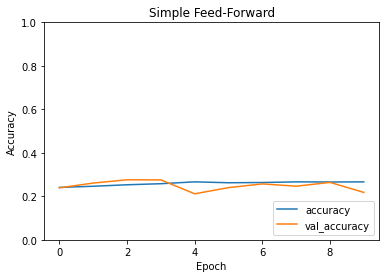

In [43]:
plot_history(ffn_history, 'Simple Feed-Forward')

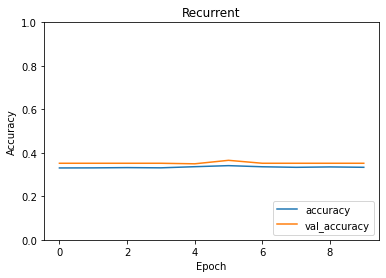

In [44]:
plot_history(rnn_history, 'Recurrent')

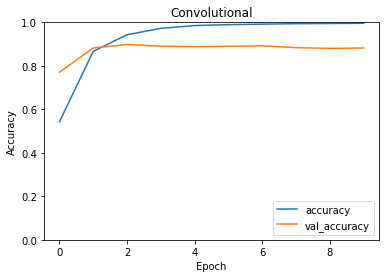

In [45]:
plot_history(cnn_history, 'Convolutional')